In [1]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [2]:
datMat=mat(loadDataSet('testSet.txt'))
datMat[:20]

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926]])

In [3]:
min(datMat[:, 0])

matrix([[-5.379713]])

In [4]:
min(datMat[:, 1])

matrix([[-4.232586]])

In [5]:
max(datMat[:, 1])

matrix([[ 5.1904]])

In [6]:
max(datMat[:, 0])

matrix([[ 4.838138]])

In [7]:
randCent(datMat, 2)

matrix([[ 2.58914712,  1.61518293],
        [ 4.73583437,  2.78832966]])

In [9]:
distEclud(datMat[0], datMat[1])

5.184632816681332

In [10]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [11]:
myCentroids, clustAssing = kMeans(datMat, 4)

[[-0.95403332 -3.43319756]
 [-1.52306118 -4.01661356]
 [-0.01385685  1.55550449]
 [ 4.39912789  1.85559496]]
[[ 1.73578167 -3.10972617]
 [-3.64094524 -2.98948247]
 [-1.54544992  2.85706781]
 [ 3.29182316  1.93982137]]
[[ 2.44502437 -2.980011  ]
 [-3.53973889 -2.89384326]
 [-2.29801424  2.79388557]
 [ 2.89375324  2.72741571]]
[[ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]


In [12]:
myCentroids

matrix([[ 2.65077367, -2.79019029],
        [-3.53973889, -2.89384326],
        [-2.46154315,  2.78737555],
        [ 2.6265299 ,  3.10868015]])

In [13]:
clustAssing

matrix([[  3.        ,   2.3201915 ],
        [  2.        ,   1.39004893],
        [  0.        ,   7.46974076],
        [  1.        ,   3.60477283],
        [  3.        ,   2.7696782 ],
        [  2.        ,   2.80101213],
        [  0.        ,   5.10287596],
        [  1.        ,   1.37029303],
        [  3.        ,   2.29348924],
        [  2.        ,   0.64596748],
        [  0.        ,   1.72819697],
        [  1.        ,   0.60909593],
        [  3.        ,   2.51695402],
        [  2.        ,   0.13871642],
        [  0.        ,   9.12853034],
        [  0.        ,  10.63785781],
        [  3.        ,   2.39726914],
        [  2.        ,   3.1024236 ],
        [  0.        ,   0.40704464],
        [  1.        ,   0.49023594],
        [  3.        ,   0.13870613],
        [  2.        ,   0.510241  ],
        [  0.        ,   0.9939764 ],
        [  1.        ,   0.03195031],
        [  3.        ,   1.31601105],
        [  2.        ,   0.90820377],
        [  0

In [14]:
import matplotlib
import matplotlib.pyplot as plt
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[ 1.7003961  -3.06412409]
 [-4.77330446 -1.62940307]
 [-2.4392688   4.24364984]
 [ 3.16236716 -0.54814428]]
[[ 2.28769    -3.23832819]
 [-3.4967025  -2.70989515]
 [-1.58985183  3.13036888]
 [ 3.15991985  1.76131985]]
[[ 2.56468005 -2.8885874 ]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.70967829  2.9214931 ]]
[[ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]


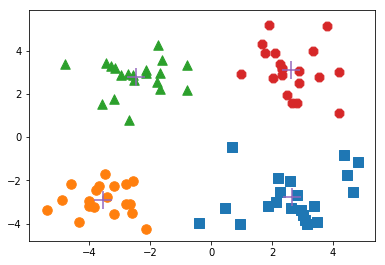

In [15]:
showPlt(datMat)

In [16]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

In [17]:
datMat3=mat(loadDataSet('testSet2.txt'))

In [18]:
centList,myNewAssments=biKmeans(datMat3, 3)

[[-4.59366365  1.12766914]
 [ 0.12133941 -3.71736138]]
[[-1.6939583   3.41367307]
 [ 1.09919724 -0.5651323 ]]
[[-1.47714714  3.46545543]
 [ 0.99677359 -0.73477953]]
[[-1.3277349   3.46607079]
 [ 0.93680474 -0.87084665]]
[[-0.84735206  3.46862312]
 [ 0.63042504 -1.33843332]]
[[-0.26853357  3.36606168]
 [ 0.02053813 -2.21845543]]
[[-0.06953469  3.29844341]
 [-0.32150057 -2.62473743]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  453.033489581 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[ 0.77244336  3.40609614]
 [ 4.20217842  3.60121347]]
[[-1.71958878  3.23919956]
 [ 3.55066577  3.20197931]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit:  77.5922493178 29.1572494441
[[ 0.03266217 -2.5433769 ]
 [-0.29557721 -2.05736765]]
[[ 0.07973025 -3.24942808]
 [-1.26873575 -2.07139688]]
[[ 0.19848727 -3.24320436]
 [-1.26405367 -2.209896  ]]
[[ 0.2642961 -3.3057243]
 [-1.1836084 -2.2507069]]
[[ 0.35496167 -3.3603355

In [19]:
centList

matrix([[-2.94737575,  3.3263781 ],
        [-0.45965615, -2.7782156 ],
        [ 2.93386365,  3.12782785]])

[[ 0.38114083 -2.94099986]
 [ 3.3747977   0.74405553]]
[[-1.10426682 -2.4955052 ]
 [ 0.8970404   2.6041076 ]]
[[-0.60201505 -2.84149005]
 [ 0.37047634  2.80883434]]
[[-0.2897198  -2.83942545]
 [ 0.08249337  2.94802785]]
sseSplit, and notSplit:  792.916856537 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  80
[[ 2.05624957 -2.41657702]
 [-1.77710416 -3.3672664 ]]
[[ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]]
sseSplit, and notSplit:  83.5874695564 326.284075201
[[ 4.09096075  3.47184925]
 [-3.17260888  4.24875231]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]]
sseSplit, and notSplit:  66.36683512 466.632781336
the bestCentToSplit is:  0
the len of bestClustAss is:  40
[[ 4.80866852 -0.65326342]
 [ 2.65718825 -1.6946873 ]]
[[ 4.589752   -1.575316  ]
 [ 2.35622556 -3.02056425]]
sseSplit, and notSplit:  28.3386015678 358.885318066
[[-2.16126636  3.98922886]
 [ 2.48681307  3.28990432]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]
sseSplit, and notSplit

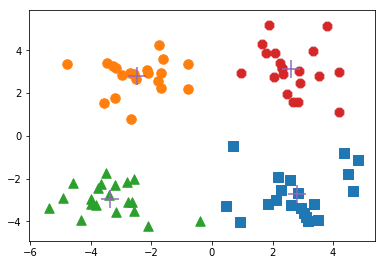

In [20]:
showPlt(datMat, alg=biKmeans)

[[ 0.6769347  -1.95127745]
 [ 3.29137484 -3.2280058 ]
 [-0.58319565 -4.01778134]
 [ 1.25381349  4.83174706]]
[[-0.64622436 -1.28938073]
 [        nan         nan]
 [-0.56924375 -3.16951017]
 [ 0.12097373  3.39830046]]
[[-1.07964383 -0.6676455 ]
 [        nan         nan]
 [-0.26162575 -3.11178156]
 [ 0.03159237  3.35037329]]
[[-1.39334014 -0.34697214]
 [        nan         nan]
 [-0.26162575 -3.11178156]
 [ 0.12097373  3.39830046]]
[[-2.29139617  0.3190665 ]
 [        nan         nan]
 [-0.35159365 -3.05723659]
 [ 0.27735416  3.33995757]]
[[-3.08714142  2.17369333]
 [        nan         nan]
 [-0.36852161 -2.96793856]
 [ 1.14052403  3.36194603]]
[[-3.06779095  3.33769884]
 [        nan         nan]
 [-0.45965615 -2.7782156 ]
 [ 2.76275171  3.12704005]]
[[-2.94737575  3.3263781 ]
 [        nan         nan]
 [-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]


/usr/local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:549: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


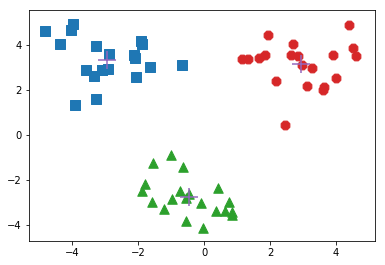

In [21]:
showPlt(datMat3)

[[-3.73015388  4.33641686]
 [ 0.35020953  0.14475902]]
[[-3.06779095  3.33769884]
 [ 1.19084544  0.24642754]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
sseSplit, and notSplit:  570.722757425 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-1.03503509  4.6965156 ]
 [-1.29373783  3.87575266]]
[[        nan         nan]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  38.0629506357 532.659806789
[[ 2.03524785  4.10899772]
 [-0.10492573  0.86532019]]
[[ 2.95977168  3.26903847]
 [-0.32150057 -2.62473743]]
[[ 2.93386365  3.12782785]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  68.6865481262 38.0629506357
the bestCentToSplit is:  1
the len of bestClustAss is:  40
[[-4.18665331  4.80290016]
 [-4.21454599  4.79208298]]
[[-2.59844753  3.47589133]
 [-3.9941604   2.8778384 ]]
[[-2.43131608  3.45250362]
 [-3.90577229  3.092145  ]]
[[-2.1459026  3.421808 ]
 [-3.7488489  3.2309482]]
[[-1.9062885   3.42271988]
 [-3.64143392  3.26215025]]
[[-1.76576557  3.39794

/usr/local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:549: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


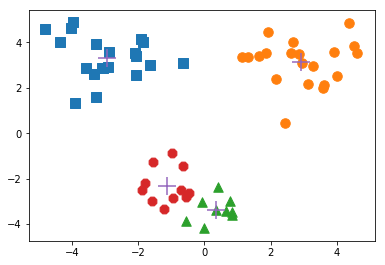

In [22]:
showPlt(datMat3, alg=biKmeans)

In [23]:
import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print(yahooApi)
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

from time import sleep
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print("error fetching")
        sleep(1)
    fw.close()

In [24]:
# geoResults = geoGrab('1 VA Center', 'Augusta ME')  #stop working as yahoo API not available any more

In [25]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-122.61115562   45.44397846]
 [-122.55560075   45.39916994]]
[[-122.63886224   45.51533564]
 [-122.47358333   45.44567   ]]
[[-122.65758128   45.51763982]
 [-122.50862708   45.48697433]]
[[-122.67148356   45.51848782]
 [-122.52692      45.49604058]]
[[-122.68205147   45.51492282]
 [-122.53722258   45.50740146]]
[[-122.69531692   45.50981882]
 [-122.54894327   45.51554093]]
[[-122.69551477   45.50729503]
 [-122.54868607   45.51882187]]
sseSplit, and notSplit:  3043.26331581 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
[[-122.70779019   45.47535942]
 [-122.75874658   45.55652191]]
[[-122.68703723   45.48856387]
 [-122.72836525   45.57987825]]
[[-122.69000022   45.48917759]
 [-122.72072414   45.59011757]]
sseSplit, and notSplit:  1435.43784877 851.438888564
[[-122.43626548   45.5416294 ]
 [-122.38700197   45.47913571]]
[[-122.55463028   45.52187369]
 [-122.376304     45.430319  ]]
[[-122.55924018   45.52238271]
 [-122.4009285    45.46897   ]]
sseSplit, and notSplit:  5

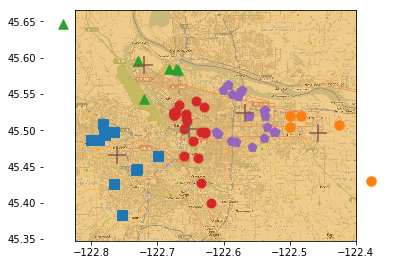

In [26]:
clusterClubs()